In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from readsql import queryToDataFrame,showTables,describeTable

In [2]:
showTables()

,Tables_in_swiftmarket
0,categories
1,customers
2,employeeinformation
3,employees
4,salesdata
5,subcategories
6,suppliers


In [3]:
describeTable('categories')

,Field,Type,Null,Key,Default,Extra
0,CategoryID,int,NO,PRI,None,
1,CategoryName,varchar(100),YES,,None,


Question

In [2]:
query = """SELECT c.categoryname,sum(s.totalprice) as TotalSales
FROM salesdata s
inner join subcategories sb
on s.subcatid = sb.subcatid
inner join categories c
on sb.categoryid = c.categoryid
group by c.categoryname;"""

df = queryToDataFrame(query)
df

,categoryname,TotalSales
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00
5,Pet Supplies and Accessories,361848986.00


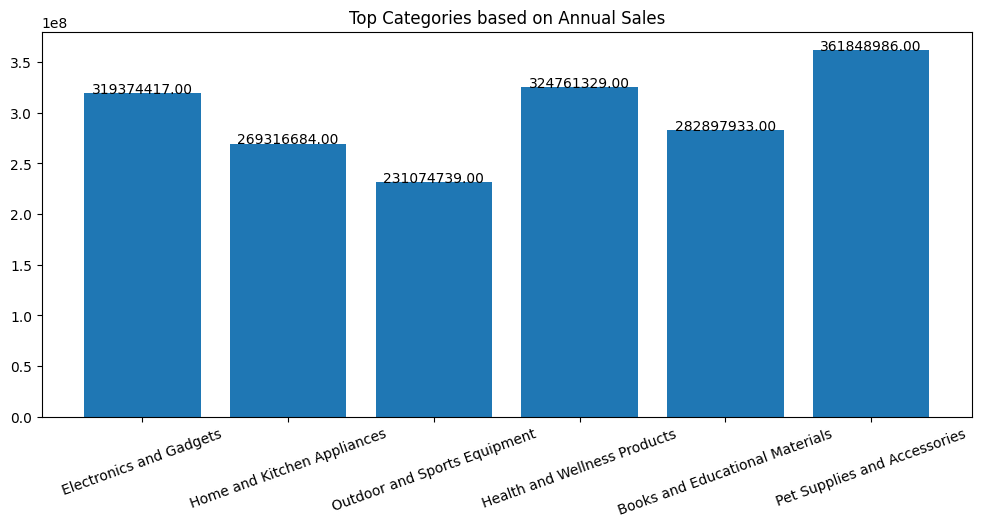

In [3]:
plt.figure(figsize=(12,5))
plt.title('Top Categories based on Annual Sales')
plt.bar(df['categoryname'].values,height=df['TotalSales'].values)

for i in range(len(df['categoryname'])):
    plt.annotate(xy=(i,df['TotalSales'].values[i]),
                 text=df['TotalSales'].values[i],
                 horizontalalignment='center')

plt.xticks(rotation=20)
plt.savefig('AnnualSales-Categories.jpeg')
plt.show()